In [34]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [35]:
k = 8.987551782E9
G = 6.6743E-11

m_e = 9.1093837015E-31
m_p = 1.67262192369E-27

q_e = -1.602176634E-19
q_p = 1.602176634E-19

Electron_pos = np.array( [ 1 , 0 , 0 ] , dtype = np.float64 )
Electron_vel = np.array( [ 0 , 14 , 0 ] , dtype = np.float64 )

Proton_pos = np.array( [ 0 , 0 , 0 ] , dtype = np.float64 )
Proton_vel = np.array( [ 0 , 0 , 0 ] , dtype = np.float64 )

Electron_x = []
Electron_y = []
Electron_z = []

Proton_x = []
Proton_y = []
Proton_z = []

T = 1E+0
dT = 1E-5

E = []

n = np.round(T/dT,0)

count0 = 0

while count0 < n :
    
    if ( count0 % 10000 == 0 ) :
        
        print( count0 )
    
    Electron_x.append( Electron_pos[0] )
    Electron_y.append( Electron_pos[1] )
    Electron_z.append( Electron_pos[2] )
    
    Proton_x.append( Proton_pos[0] )
    Proton_y.append( Proton_pos[1] )
    Proton_z.append( Proton_pos[2] )
    
    dx = Electron_pos[0] - Proton_pos[0]
    dy = Electron_pos[1] - Proton_pos[1]
    dz = Electron_pos[2] - Proton_pos[2]

    r = np.sqrt( dx**2 + dy**2 + dz**2 )

    Fe = np.float64( k * q_e * q_p / r**2 )
    Fg = np.float64( -G * m_e * m_p / r**2 )
    
    E = np.append( E ,
        0.5 * m_e * ( Electron_vel[0]**2 + Electron_vel[1]**2 + Electron_vel[2]**2 ) +
        0.5 * m_p * ( Proton_vel[0]**2 + Proton_vel[1]**2 + Proton_vel[2]**2 ) +
        k * q_e * q_p / r +
        -G * m_e * m_p / r
        )
    
    Electron_pos[0] = Electron_pos[0] + Electron_vel[0] * dT + 0.5 * np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( Fe + Fg ) / m_e * dT**2
    Electron_pos[1] = Electron_pos[1] + Electron_vel[1] * dT + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( Fe + Fg ) / m_e * dT**2
    Electron_pos[2] = Electron_pos[2] + Electron_vel[2] * dT + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( Fe + Fg ) / m_e * dT**2
    
    Proton_pos[0] = Proton_pos[0] + Proton_vel[0] * dT + 0.5 * np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( -Fe - Fg ) / m_p * dT**2
    Proton_pos[1] = Proton_pos[1] + Proton_vel[1] * dT + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( -Fe - Fg ) / m_p * dT**2
    Proton_pos[2] = Proton_pos[2] + Proton_vel[2] * dT + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( -Fe - Fg ) / m_p * dT**2
    
    FE = np.float64( k * q_e * q_p / r**2 )
    
    FG = np.float64( -G * m_e * m_p / r**2 )

    Electron_vel[0] = Electron_vel[0] + 0.5 * np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( Fe + Fg + FE + FG ) / m_e * dT
    Electron_vel[1] = Electron_vel[1] + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( Fe + Fg + FE + FG ) / m_e * dT
    Electron_vel[2] = Electron_vel[2] + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( Fe + Fg + FE + FG ) / m_e * dT
    
    Proton_vel[0] = Proton_vel[0] + 0.5 * np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( -Fe - Fg - FE - FG ) / m_p  * dT
    Proton_vel[1] = Proton_vel[1] + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( -Fe - Fg - FE - FG ) / m_p  * dT
    Proton_vel[2] = Proton_vel[2] + 0.5 * np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( -Fe - Fg - FE - FG ) / m_p  * dT
    
    Fe = FE
    Fg = FG
    
    count0 = count0 + 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


<Figure size 432x288 with 0 Axes>

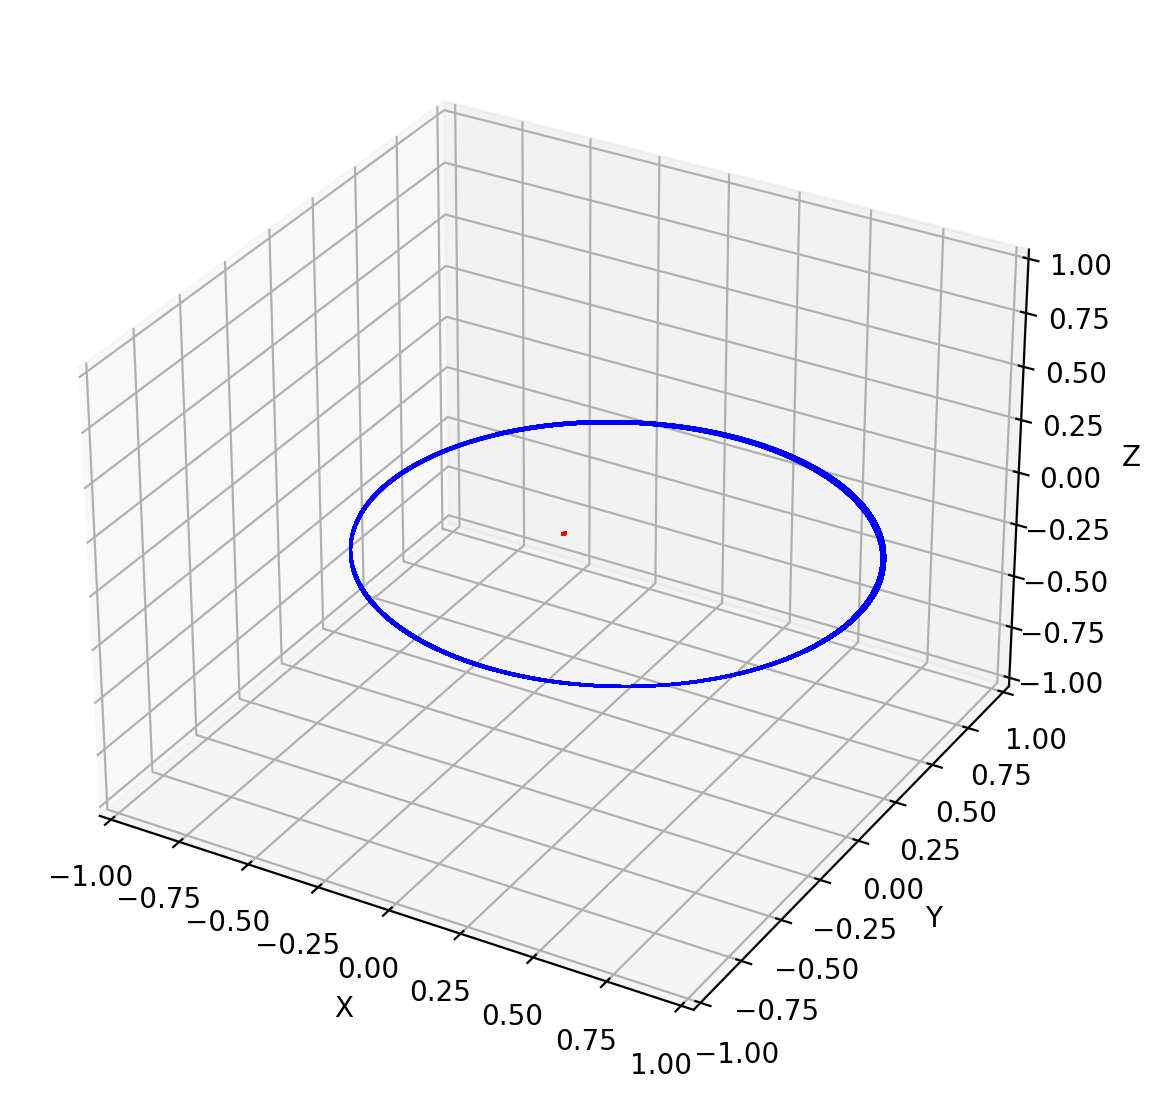

In [36]:
Boundary = 1

fig = plt.figure()

plt.figure( figsize = ( 14 , 7 ) , dpi = 200 )

ax = plt.axes( projection = "3d" )

Electron_x2 , Electron_y2 , Electron_z2 , Proton_x2 , Proton_y2 , Proton_z2 = np.loadtxt( "D:\Education\FORTRAN\data.csv" , unpack = 1 )
E = np.loadtxt( "D:\Education\FORTRAN\data2.csv" , unpack = 1 )

ax.scatter3D( Electron_x , Electron_y , Electron_z , c = "#0000FF" , s = 0.05 , marker = "," )
ax.scatter3D( Proton_x , Proton_y , Proton_z , c = "#FF0000" , s = 0.05 , marker = "," )

#ax.scatter3D( Electron_x2 , Electron_y2 , Electron_z2 , c = "#0000FF" , s = 0.05 , marker = "," )
#ax.scatter3D( Proton_x2 , Proton_y2 , Proton_z2 , c = "#FF0000" , s = 0.05 , marker = "," )

ax.set_xlim3d( left = -Boundary , right = Boundary )
ax.set_ylim3d( bottom = -Boundary , top = Boundary )
ax.set_zlim3d( bottom = -Boundary , top = Boundary )

ax.set_xlabel( "X" )
ax.set_ylabel( "Y" )
ax.set_zlabel( "Z" )

plt.show()

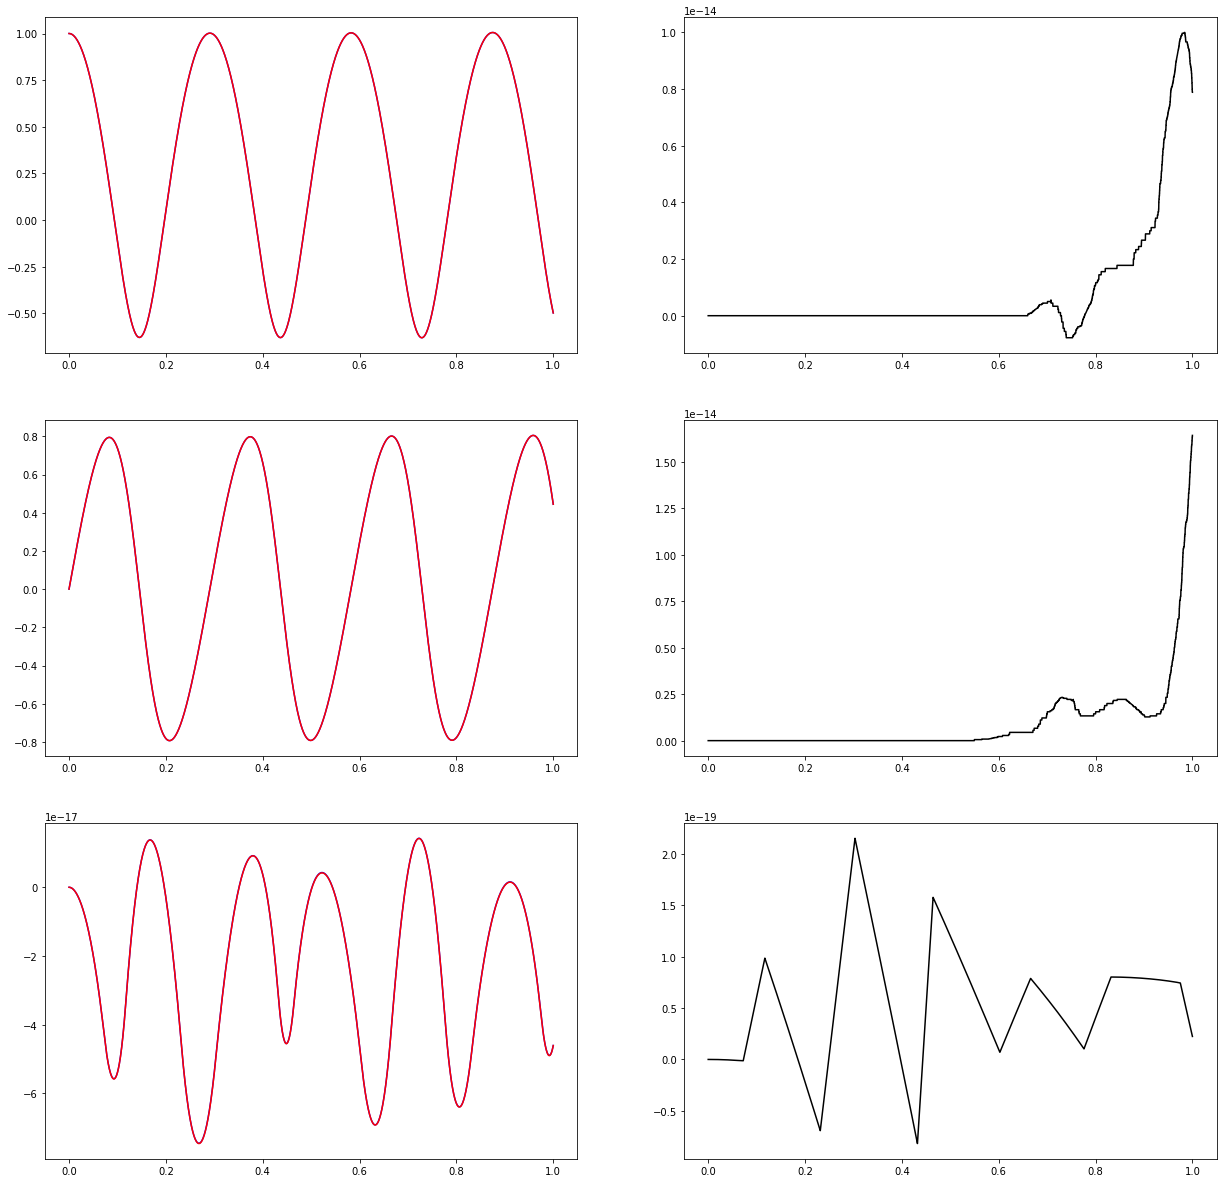

In [37]:
t = np.linspace( 0 , T , int(n) )

fig , ax = plt.subplots( 3 , 2 )

fig.set_figheight(21)
fig.set_figwidth(21)

ax[0,0].plot( t, Electron_x , c = "#0000FF")
ax[0,0].plot( t, Electron_x2 , c = "#FF0000")

ax[0,1].plot( t, Electron_x - Electron_x2 , c = "#000000" )

ax[1,0].plot( t, Electron_y , c = "#0000FF")
ax[1,0].plot( t, Electron_y2 , c = "#FF0000")

ax[1,1].plot( t, Electron_y - Electron_y2 , c = "#000000" )

ax[2,0].plot( t, Electron_z , c = "#0000FF")
ax[2,0].plot( t, Electron_z2 , c = "#FF0000")

ax[2,1].plot( t, Electron_z - Electron_z2 , c = "#000000" )



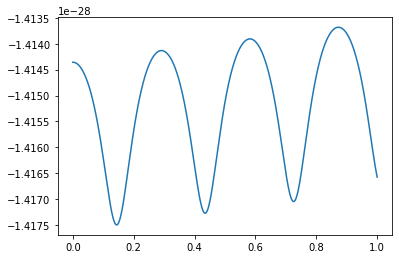

In [8]:
plt.plot( t , E )
plt.show()